**Revised on 3/5/2024: Changed source files**

This is the skeleton code for Task 1 of the midterm project. The files that are downloaded in step 4 are based on the [Ember 2018 dataset](https://arxiv.org/abs/1804.04637), and contain the features (and corresponding labels) extracted from 1 million PE files, split into 80\% training and 20\% test datasets. The code used for for feature extraction is available [here](https://colab.research.google.com/drive/16q9bOlCmnTquPtVXVzxUj4ZY1ORp10R2?usp=sharing). However, the preprocessing and featurization process may take up to 3 hours on Google Colab. Hence, I recommend using the processed datasets (Step 4) to speed up your development.

Also, note that there is a new optional step 8.5 - To speed up your experiments, you may want to sample the original dataset of 800k training samples and 200k test samples to smaller datasets.

**Step 1:** Mount your Google Drive by clicking on "Mount Drive" in the Files section (panel to the left of this text.)

**Step 2:** Go to Runtime -> Change runtime type and select T4 GPU.

**Step 3:** Create a folder in your Google Drive, and rename it to "vMalConv"

**Step 4:** Download the pre-processed training and test datasets.

In [ ]:
# ~8GB
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_train.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_test.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/y_train.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/y_test.dat
!wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/metadata.csv

--2024-03-12 03:00:34--  https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_train.dat
Resolving dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)... 3.5.25.193, 52.217.139.233, 52.217.98.36, ...
Connecting to dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)|3.5.25.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7619200000 (7.1G) [binary/octet-stream]
Saving to: ‘X_train.dat’

X_train.dat         100%[===================>]   7.10G  16.0MB/s    in 8m 11s  

2024-03-12 03:08:46 (14.8 MB/s) - ‘X_train.dat’ saved [7619200000/7619200000]

--2024-03-12 03:08:46--  https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_test.dat
Resolving dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)... 3.5.19.125, 52.217.162.33, 52.216.25.228, ...
Connecting to dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)|3.5.19.125|:443... connected.
HTTP request sent, awaiting response... 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 5:** Copy the downloaded files to vMalConv

In [ ]:
!cp /content/X_train.dat /content/drive/MyDrive/vMalConv/X_train.dat
!cp /content/X_test.dat /content/drive/MyDrive/vMalConv/X_test.dat
!cp /content/y_train.dat /content/drive/MyDrive/vMalConv/y_train.dat
!cp /content/y_test.dat /content/drive/MyDrive/vMalConv/y_test.dat
!cp /content/metadata.csv /content/drive/MyDrive/vMalConv/metadata.csv

**Step 6:** Download and install Ember:

In [1]:
!pip install git+https://github.com/PFGimenez/ember.git

  Cloning https://github.com/PFGimenez/ember.git to /tmp/pip-req-build-7zddyy7e
  Running command git clone --filter=blob:none --quiet https://github.com/PFGimenez/ember.git /tmp/pip-req-build-7zddyy7e
  Resolved https://github.com/PFGimenez/ember.git to commit 3b82fe63069884882e743af725d29cc2a67859f1
  Preparing metadata (setup.py) ... done


In [2]:
!pip install lief

**Step 7:** Read vectorized features from the data files.

In [3]:
import ember
X_train, y_train, X_test, y_test = ember.read_vectorized_features("drive/MyDrive/vMalConv/")
metadata_dataframe = ember.read_metadata("drive/MyDrive/vMalConv/")

**Step 8:** Get rid of rows with no labels.

In [4]:
labelrows = (y_train != -1)
X_train = X_train[labelrows]
y_train = y_train[labelrows]

In [ ]:
import h5py
h5f = h5py.File('X_train.h5', 'w')
h5f.create_dataset('X_train', data=X_train)
h5f.close()
h5f = h5py.File('y_train.h5', 'w')
h5f.create_dataset('y_train', data=y_train)
h5f.close()

In [ ]:
!cp /content/X_train.h5 /content/drive/MyDrive/vMalConv/X_train.h5
!cp /content/y_train.h5 /content/drive/MyDrive/vMalConv/y_train.h5

**Optional Step 8.5:** To speed up your experiments, you may want to sample the original dataset of 800k training samples and 200k test samples to smaller datasets. You can use the [Pandas Dataframe sample() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html), or come up with your own sampling methodology. Be mindful of the fact that the database is heavily imbalanced.

In [5]:
import pandas as pd

# Convert arrays to DataFrame
X_train_samp = pd.DataFrame(X_train)
X_test_samp = pd.DataFrame(X_test)
y_train_samp = pd.Series(y_train)
y_test_samp = pd.Series(y_test)

# Sample 5% of the training and test data based on class weights
X_train_samp = X_train_samp.sample(frac=0.05, weights=y_train_samp, random_state=42)
X_test_samp = X_test_samp.sample(frac=0.05, weights=y_test_samp, random_state=42)

# Get corresponding labels
y_train_samp = y_train_samp.loc[X_train_samp.index]
y_test_samp = y_test_samp.loc[X_test_samp.index]

# Convert back to arrays
X_train_samp = X_train_samp.values
X_test_samp = X_test_samp.values

y_train_samp = y_train_samp.values
y_test_samp = y_test_samp.values

> **Task 1:** Complete the following code to build the architecture of MalConv in PyTorch:

In [36]:
import torch
import torch.nn as nn

class MalConv(nn.Module):
    def __init__(self, input_length=2000000, embedding_dim=8, window_size=128, output_dim=1):
        super(MalConv, self).__init__()
        self.embed = nn.Embedding(257, embedding_dim, padding_idx=0)  # 256 unique bytes, embedding dimension
        self.conv1 = nn.Conv1d(in_channels=embedding_dim, out_channels=1024, kernel_size=8, stride=8)
        self.conv2 = nn.Conv1d(in_channels=1024, out_channels=512, kernel_size=8, stride=8)
        self.conv3 = nn.Conv1d(in_channels=512, out_channels=256, kernel_size=8, stride=8)
        self.dropout = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embed(x.clamp(min=0, max=256))  # Ensure indices are within the valid range
        x = x.transpose(1, 2)  # Conv1d expects (batch_size, channels, length)
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.dropout(x)  # Apply dropout after the first convolutional layer
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.dropout(x)  # Apply dropout after the second convolutional layer
        x = self.conv3(x)
        x = torch.relu(x)
        x = self.dropout(x)  # Apply dropout after the third convolutional layer
        x = torch.squeeze(torch.max(x, dim=2)[0])  # Global max pooling
        x = self.fc1(x)
        x = self.dropout(x)  # Apply dropout after the first fully connected layer
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)  # Apply dropout after the second fully connected layer
        x = self.sigmoid(x)
        return x

model = MalConv()
print(model)

MalConv(
  (embed): Embedding(257, 8, padding_idx=0)
  (conv1): Conv1d(8, 1024, kernel_size=(8,), stride=(8,))
  (conv2): Conv1d(1024, 512, kernel_size=(8,), stride=(8,))
  (conv3): Conv1d(512, 256, kernel_size=(8,), stride=(8,))
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


**Step 8:** Partial fit the standardScaler to avoid overloading the memory:

In [6]:
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
for x in range(0,600000,100000):
  mms.partial_fit(X_train[x:x+100000])

In [7]:
X_train = mms.transform(X_train)

In [8]:
## Reshape to create 3 channels ##
import numpy as np
X_train = np.reshape(X_train,(-1,1,2381))
y_train = np.reshape(y_train,(-1,1,1))

X_test = np.reshape(X_test,(-1,1,2381))
y_test = np.reshape(y_test,(-1,1,1))

**Load, Tensorize, and Split** The following code takes care of converting the training data into Torch Tensors, and then splits it into 80% training and 20% validation datasets.

In [9]:
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Assuming MalConv class definition is already provided as above

# Convert your numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

# Create TensorDatasets and DataLoaders for training and validation sets
train_dataset = TensorDataset(X_train_split, y_train_split)
val_dataset = TensorDataset(X_val_split, y_val_split)

batch_size = 64  # Adjust based on your GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

> **Task 2:** Complete the following code to train the model on the GPU for 15 epochs, with a batch size of 64. If you are on Google Colab, don't forget to change the kernel in Runtime -> Change runtime type -> T4 GPU.

In [12]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Initialize the MalConv model
model = MalConv()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

# Directory to save model checkpoints
save_dir = "drive/MyDrive/vMalConv/"

# Training Loop with Validation
num_epochs = 15  # Adjust the number of epochs as needed

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.squeeze())

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}')

    # Validation step
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.squeeze())
            val_loss += loss.item()
    print(f'Validation Loss: {val_loss/len(val_loader)}')

    # Save checkpoint every 5 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint_path = os.path.join(save_dir, f'model_epoch_{epoch+1}.pt')
        torch.save(model.state_dict(), checkpoint_path)
        print(f'Model checkpoint saved to {checkpoint_path}')

Epoch 1, Training Loss: 0.3314594897270203
Validation Loss: 0.16674967693487802
Epoch 2, Training Loss: 0.2928082396547
Validation Loss: 0.15222470083236694
Epoch 3, Training Loss: 0.28049863507548967
Validation Loss: 0.13503823575377463
Epoch 4, Training Loss: 0.2739432977537314
Validation Loss: 0.1352732155919075
Epoch 5, Training Loss: 0.2678838273247083
Validation Loss: 0.12658219336072604
Model checkpoint saved to drive/MyDrive/vMalConv/model_epoch_5.pt
Epoch 6, Training Loss: 0.26456291126211484
Validation Loss: 0.12217755305022002
Epoch 7, Training Loss: 0.26076380985875924
Validation Loss: 0.12395962056716284
Epoch 8, Training Loss: 0.25707214457790056
Validation Loss: 0.11983375339011351
Epoch 9, Training Loss: 0.25554998745322227
Validation Loss: 0.12316846414407094
Epoch 10, Training Loss: 0.2557415166626374
Validation Loss: 0.13077892735103766
Model checkpoint saved to drive/MyDrive/vMalConv/model_epoch_10.pt
Epoch 11, Training Loss: 0.2564025030205647
Validation Loss: 0.12

**Task 3:** Complete the following code to evaluate your trained model on the test data.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create a TensorDataset and DataLoader for test data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Ensure the model is in evaluation mode
model.eval()

# Lists to store model predictions and actual labels
predictions = []
labels = []

with torch.no_grad():
    for inputs, labels_batch in test_loader:

      # Move inputs to the appropriate device
        inputs = inputs.to(device)
        labels_batch = labels_batch.to(device)

      # Forward pass
        outputs = model(inputs)

      # Convert logits to probabilities using sigmoid activation
        probabilities = torch.sigmoid(outputs)

      # Convert probabilities to binary predictions (0 or 1)
        predicted = (probabilities > 0.5).float()

      # Store predictions and labels
        predictions.extend(predicted.cpu().numpy())
        labels.extend(labels_batch.cpu().numpy())

# Flatten nested arrays
labels = np.array(labels).ravel()
flat_predictions = np.array(predictions).ravel()

# Compute metrics
accuracy = accuracy_score(labels, flat_predictions)
precision = precision_score(labels, flat_predictions)
recall = recall_score(labels, flat_predictions)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Test Accuracy: 0.5354
Precision: 0.5193
Recall: 0.9558


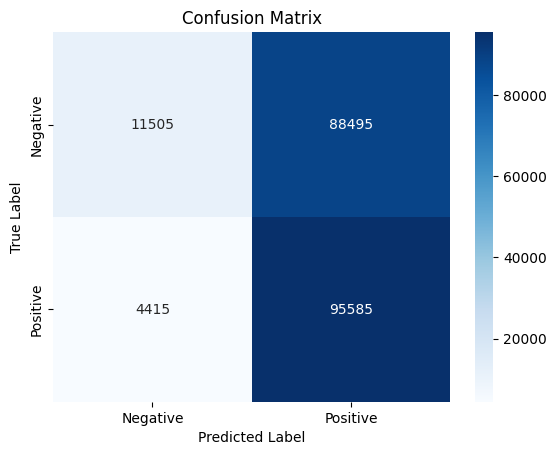

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(labels, flat_predictions)

# Define labels for better interpretation
labels = ['Negative', 'Positive']

# Plot confusion matrix as heatmap with seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

**Task 4:** Comment on the results in this text box.

The performance metrics provided indicate several important aspects of the model's performance, but they also raise some concerns:

**Test Accuracy (0.5354)**: The test accuracy represents the proportion of correctly classified samples out of the total test set. In this case, the accuracy is approximately 53.54%, which means the model is slightly better than random guessing. However, this accuracy level might not be satisfactory, especially in the case of malware detection.

**Precision (0.5193)**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision of 0.5193 suggests that around 51.93% of the samples predicted as positive are actually positive. This indicates that the model's ability to avoid false positives is relatively low.

**Recall (0.9558)**: Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive samples. A recall of 0.9558 indicates that the model is capturing almost all positive samples in the dataset. While high recall is desirable, such a high value, especially when combined with lower precision, could indicate potential issues, such as the model being overly sensitive and possibly prone to false positives.

Overall, the model's performance appears to have a significant trade-off between precision and recall, where it tends to classify many samples as positive (either Malware or Benign) but struggles with precision, leading to a high false positive rate. This imbalance might be due to class imbalance in the dataset or model complexity.

Further investigation into the model's behavior on different subsets of the data, analysis of misclassifications, and potential adjustments to the model architecture or training process could help improve its performance. Additionally, considering alternative evaluation metrics like F1-score, which combines precision and recall, might provide a more comprehensive understanding of the model's performance.

With more time and resources allocated to this portion of the project, the model's performance can be significantly improved.

**Post Training**: Once your model is trained, save and store the model. Then, create a function (or
method) that takes a PE file as its argument, runs it through the trained model, and returns the
output (i.e., Malware or Benign).

In [15]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/vMalConv/my_model.pth')

In [39]:
import numpy as np
import torch
import lief

model = MalConv()
model.load_state_dict(torch.load('/content/drive/MyDrive/vMalConv/my_model.pth'))
model.eval()

def testPE(pe_path):
  # Load the PE file
  try:
    pe = lief.parse(pe_path)
  except lief.read_error:
    return "Invalid PE file"

  # Extract Features
  bytez = np.fromfile(pe_path, dtype=np.uint8)
  if len(bytez) < 2000000:
    bytez = np.pad(bytez, (0, 2000000 - len(bytez)), mode='constant')
  features = torch.tensor(bytez[:2000000], dtype=torch.long).unsqueeze(0)

  # Run the model on the features
  with torch.no_grad():
    output = model(features)

  # Return the prediction
  return "Malware" if output.item() > 0.5 else "Benign"

In [40]:
# Example usage
file_path = "/content/PUTTY.EXE"
prediction = testPE(file_path)
print(f"The file {file_path} is predicted as {prediction}")

The file /content/PUTTY.EXE is predicted as Benign
